In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geophone-sensor-dataset/geophone-sensor-data.csv


### Task 1: Dataset Overview
Inspect the structure and summary of the dataset to understand its composition.



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/kaggle/input/geophone-sensor-dataset/geophone-sensor-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm data loading
print(df.head())


# Summary of the dataset
print(df.info())
print(df.describe())


  timestamp         mean   top_3_mean   min   max   std_dev  median      q1  \
0  01:51:43  2046.726000  2057.666667  2035  2060  3.452186  2047.0  2043.0   
1  01:51:46  2046.619333  2053.000000  2040  2053  3.580469  2047.0  2044.0   
2  01:51:50  2046.598000  2056.000000  2030  2059  3.592826  2047.0  2044.0   
3  01:51:53  2046.560000  2054.000000  2039  2055  3.414830  2047.0  2044.0   
4  01:51:56  2046.656667  2055.000000  2034  2057  3.356802  2048.0  2044.0   

       q3  skewness  dominant_freq        energy activity   name  
0  2049.0 -0.152574          601.0  1.988682e+09  walking  Yusuf  
1  2050.0 -0.150615          300.0  1.988028e+09  walking  Yusuf  
2  2049.0 -0.370125          300.0  1.987897e+09  walking  Yusuf  
3  2049.0 -0.321296          300.0  1.987662e+09  walking  Yusuf  
4  2049.0 -0.379134          300.0  1.988255e+09  walking  Yusuf  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column     

### Task 2: Checking for Missing Values
Analyze and visualize the dataset for any missing or null values.



timestamp        0
mean             0
top_3_mean       0
min              0
max              0
std_dev          0
median           0
q1               0
q3               0
skewness         0
dominant_freq    0
energy           0
activity         0
name             0
dtype: int64


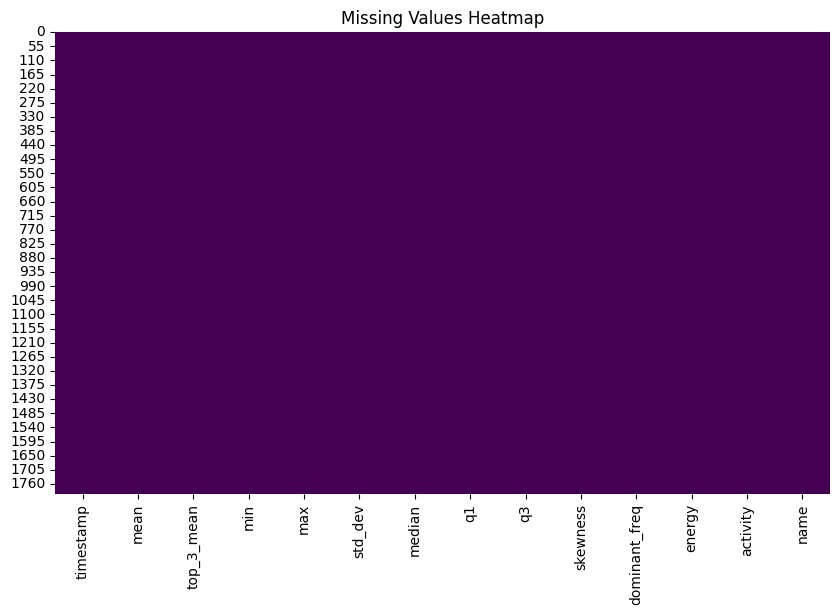

In [3]:
# Task 2: Checking for Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### Task 3: Statistical Summary
Generate a statistical summary of numerical columns to observe distributions and ranges.



In [4]:
# Task 3: Statistical Summary
# Summary statistics of numerical columns
statistical_summary = df.describe()
print(statistical_summary)


              mean   top_3_mean          min          max      std_dev  \
count  1800.000000  1800.000000  1800.000000  1800.000000  1800.000000   
mean   2042.246501  2064.689630  2016.367222  2067.155556     8.528827   
std       3.659114    28.293622    28.134259    31.800504    10.760641   
min    2034.810667  2039.000000  1948.000000  2039.000000     1.374898   
25%    2039.495333  2047.333333  2012.000000  2048.000000     2.710610   
50%    2041.287333  2052.333333  2031.000000  2053.000000     3.455542   
75%    2045.835667  2065.333333  2035.000000  2070.000000     4.707158   
max    2050.708667  2232.666667  2045.000000  2261.000000    37.678959   

            median           q1           q3     skewness  dominant_freq  \
count  1800.000000  1800.000000  1800.000000  1800.000000    1800.000000   
mean   2043.395556  2037.628333  2048.029722    -0.347341     410.099444   
std       5.044266     4.490098     9.018572     0.411987     152.875171   
min    2034.000000  2021.0000

### Task 4: Activity Distribution
Visualize the distribution of activities (walking, running, waiting) across the dataset.



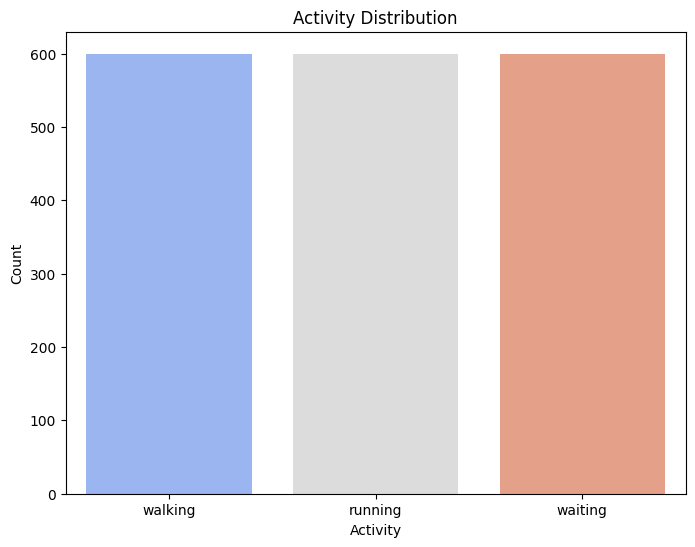

In [5]:
# Visualize activity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='activity', data=df, palette='coolwarm')
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


### Task 5: User Distribution
Analyze the number of data entries per individual to ensure balance in the dataset.



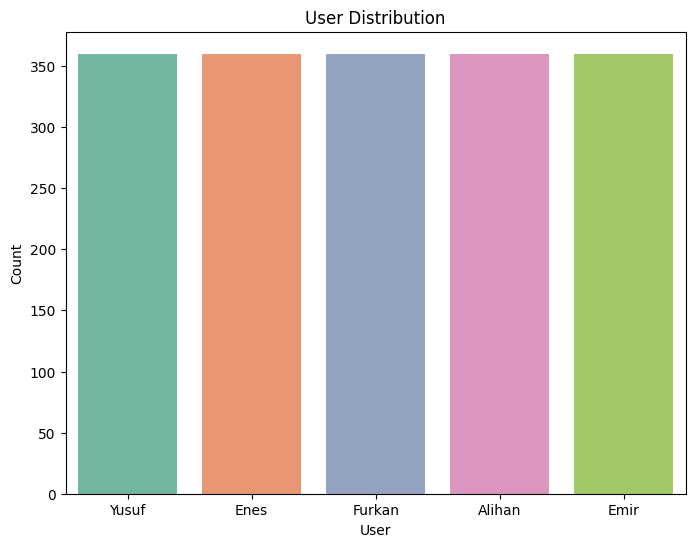

In [6]:
# Visualize user distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='name', data=df, palette='Set2')
plt.title('User Distribution')
plt.xlabel('User')
plt.ylabel('Count')
plt.show()



### Task 6: Correlation Analysis
Explore correlations between numerical features using a heatmap to identify relationships.


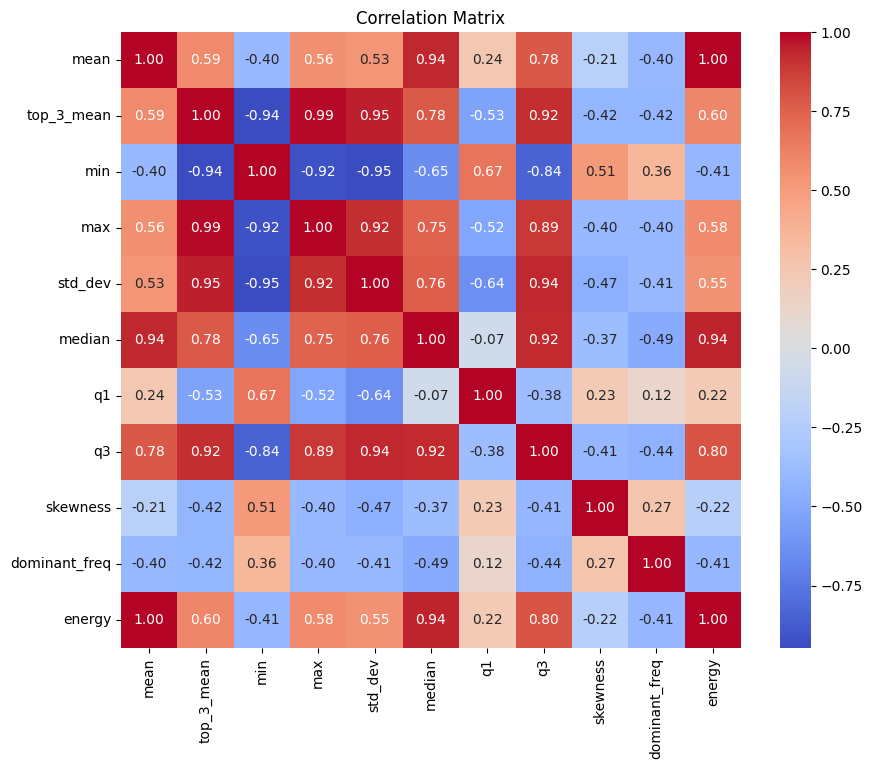

In [7]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()





### Task 7: Frequency Analysis
Visualize the distribution of dominant frequencies for each activity.



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


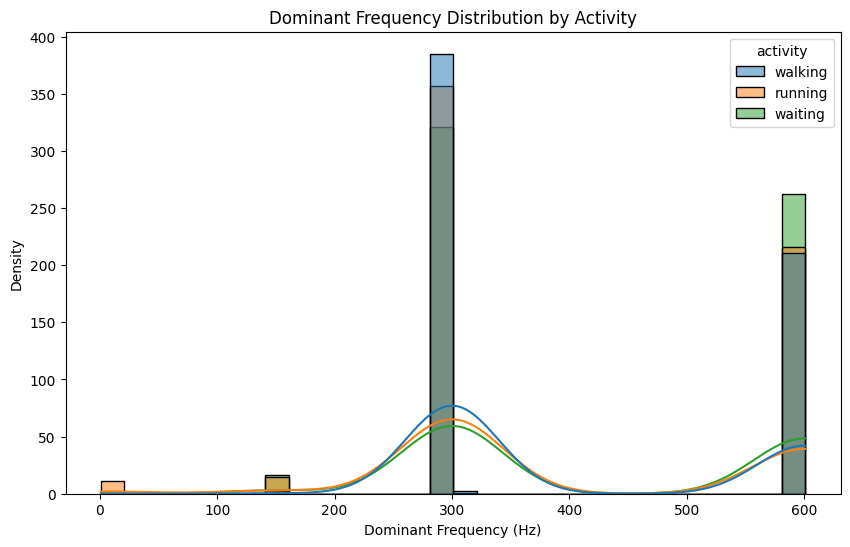

In [8]:
# Distribution of dominant frequencies for each activity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dominant_freq', hue='activity', kde=True, palette='tab10', bins=30)
plt.title('Dominant Frequency Distribution by Activity')
plt.xlabel('Dominant Frequency (Hz)')
plt.ylabel('Density')
plt.show()


### Task 8: Variability of Signal Energy
Examine the variability of signal energy across activities and users.



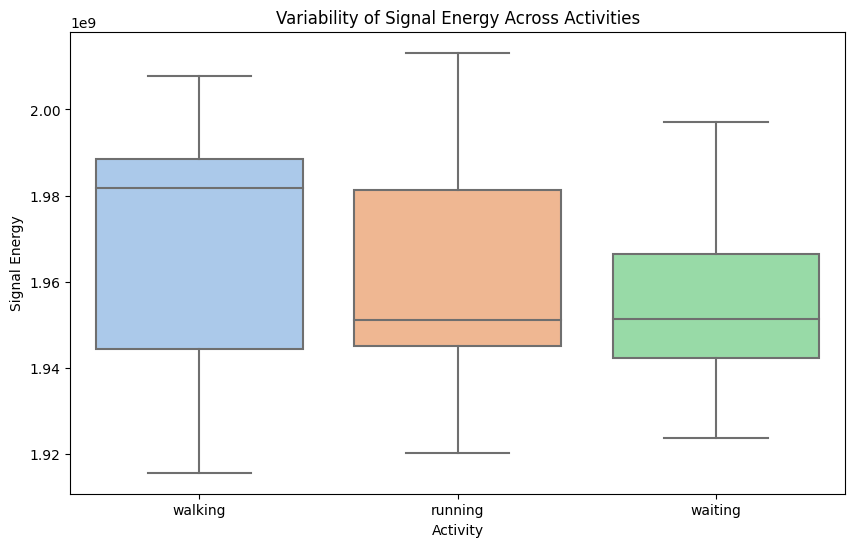

In [9]:
# Variability of signal energy by activity
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='energy', data=df, palette='pastel')
plt.title('Variability of Signal Energy Across Activities')
plt.xlabel('Activity')
plt.ylabel('Signal Energy')
plt.show()



### Task 9: Feature Distribution by Activity
Compare statistical feature distributions (mean, median, etc.) across activities.



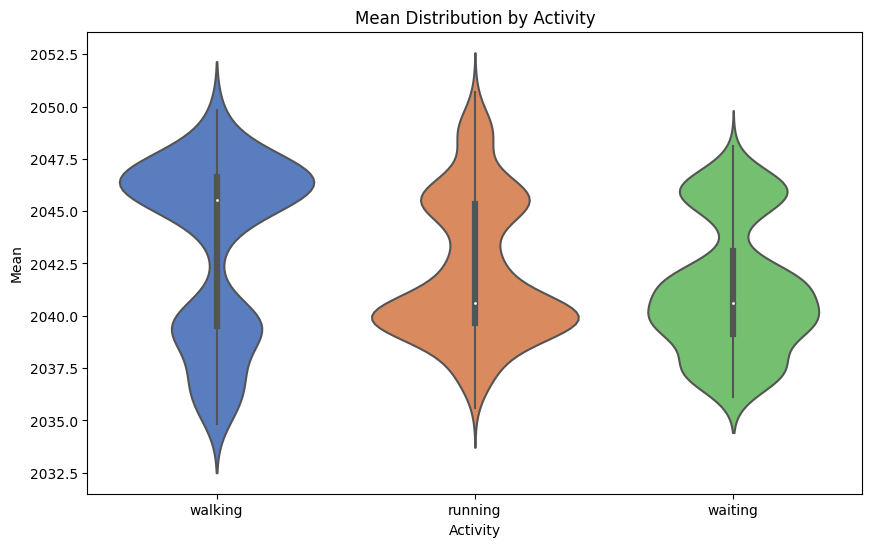

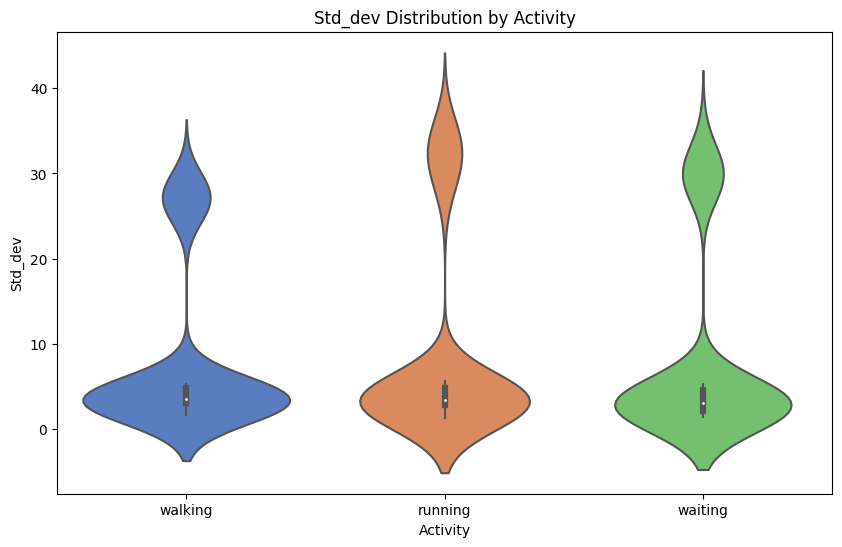

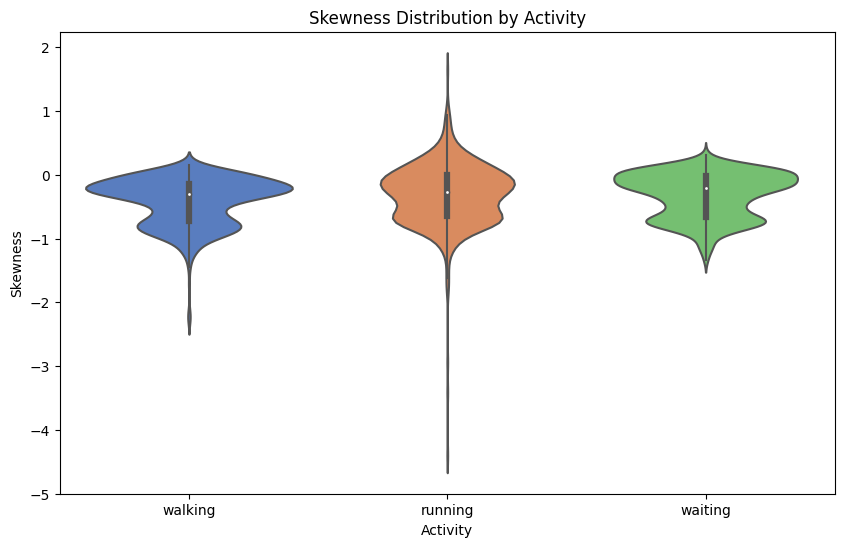

In [10]:
# Compare statistical feature distributions (mean, std_dev, etc.) across activities
features_to_compare = ['mean', 'std_dev', 'skewness']
for feature in features_to_compare:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='activity', y=feature, data=df, palette='muted')
    plt.title(f'{feature.capitalize()} Distribution by Activity')
    plt.xlabel('Activity')
    plt.ylabel(feature.capitalize())
    plt.show()



### Task 10: Activity-wise Skewness
Analyze the skewness of signals for each activity to understand data asymmetry.




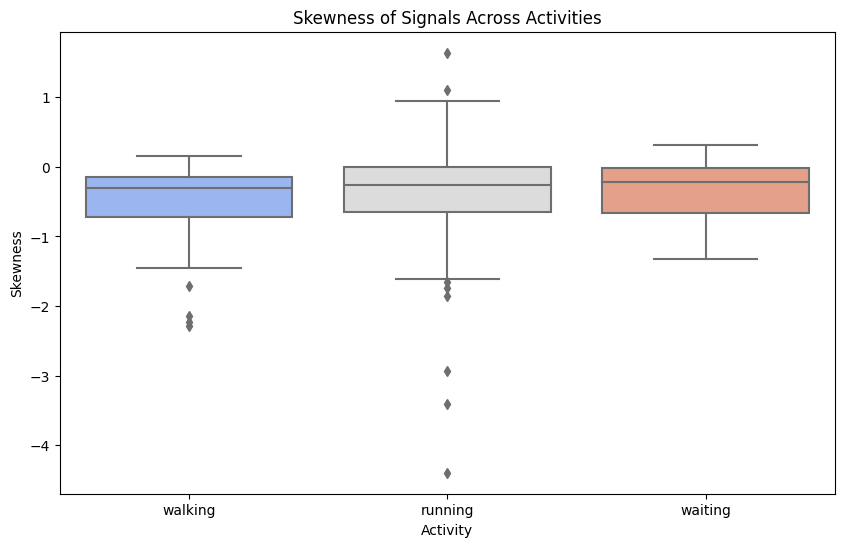

In [11]:
# Skewness of signals for each activity
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='skewness', data=df, palette='coolwarm')
plt.title('Skewness of Signals Across Activities')
plt.xlabel('Activity')
plt.ylabel('Skewness')
plt.show()



### Task 11: Box Plot of Features
Use box plots to visualize the spread of features like mean, standard deviation, and energy.



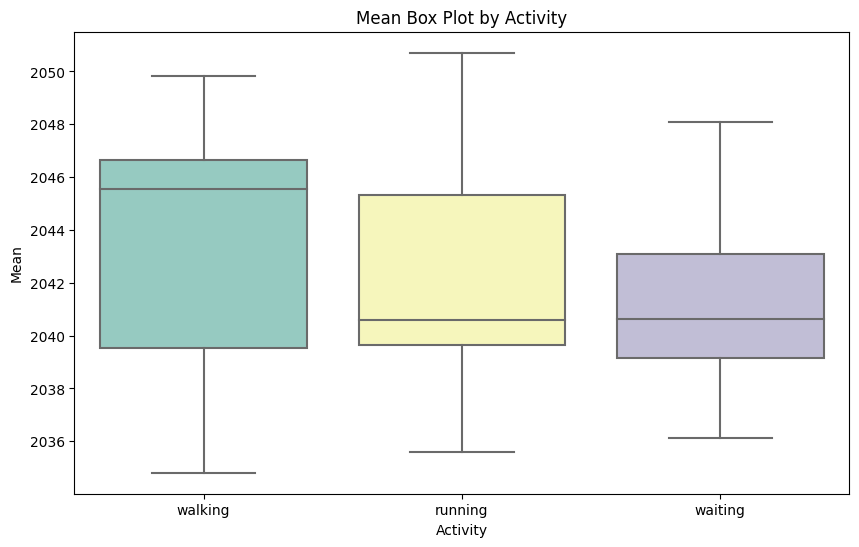

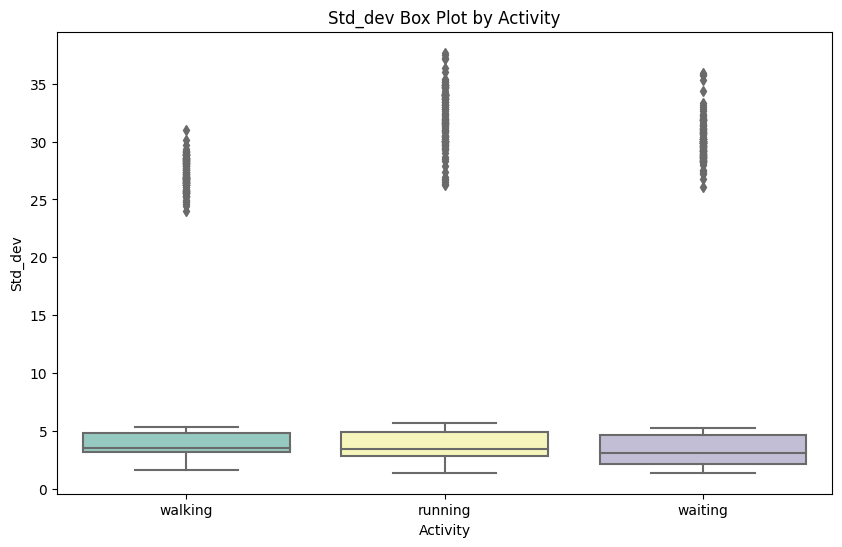

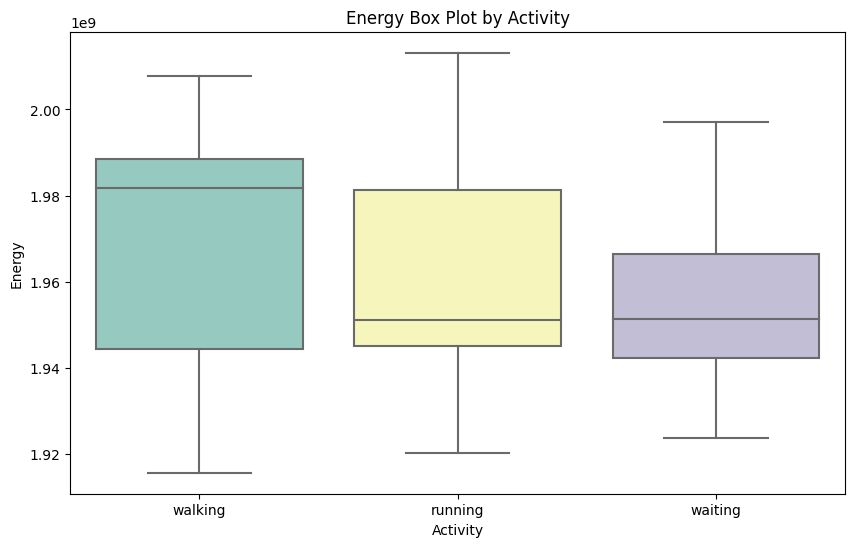

In [12]:
# Box plot for mean, standard deviation, and energy
features_to_plot = ['mean', 'std_dev', 'energy']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='activity', y=feature, data=df, palette='Set3')
    plt.title(f'{feature.capitalize()} Box Plot by Activity')
    plt.xlabel('Activity')
    plt.ylabel(feature.capitalize())
    plt.show()



### Task 12: Time Window Consistency
Verify the consistency of time windows (120 rows per window) across individuals and activities.

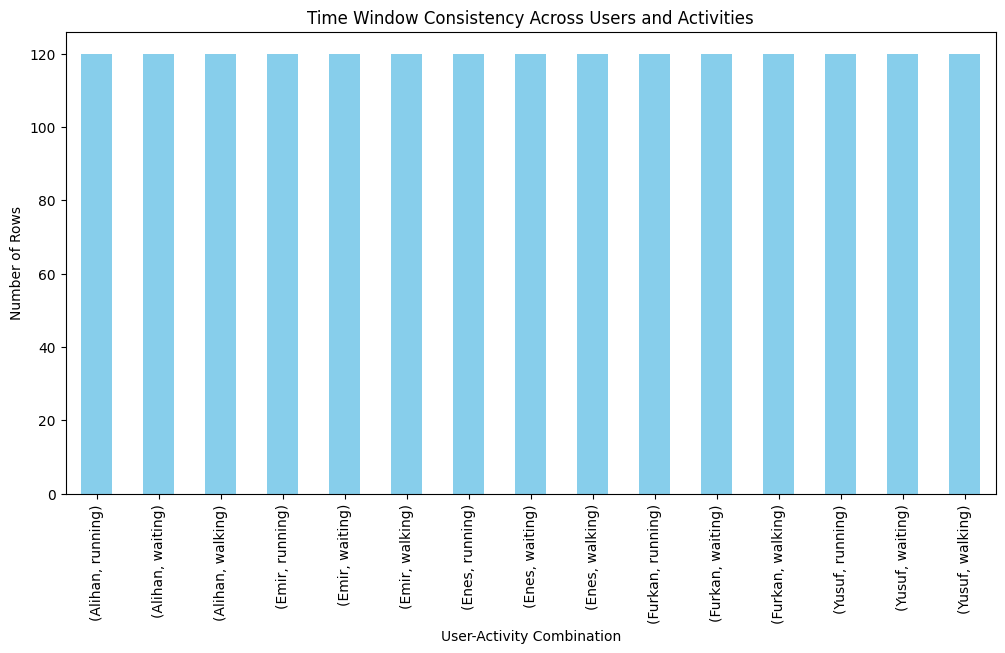

In [13]:
# Check time window consistency by grouping data
time_window_counts = df.groupby(['name', 'activity']).size()

# Plot consistency
time_window_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Time Window Consistency Across Users and Activities')
plt.xlabel('User-Activity Combination')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()

